# Creating your own dataset from Google Images

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

In [3]:
from fastai.vision import *

In [4]:
from fastai.callbacks import *

## Get a list of URLs, create directories and download images

In [54]:
folder = 'badminton'
file = 'badminton_urls.txt'

In [57]:
folder = 'baseball'
file = 'baseball_urls.txt'

In [60]:
folder = 'basketball'
file = 'basketball_urls.txt'

In [63]:
folder = 'boxing'
file = 'boxing_urls.txt'

In [66]:
folder = 'chess'
file = 'chess_urls.txt'

In [69]:
folder = 'cricket'
file = 'cricket_urls.txt'

In [72]:
folder = 'fencing'
file = 'fencing_urls.txt'

In [75]:
folder = 'football'
file = 'football_urls.txt'

In [78]:
folder = 'formula1'
file = 'formula1_urls.txt'

In [82]:
folder = 'gymnastics'
file = 'gymnastics_urls.txt'

In [1]:
folder = 'hockey'
file = 'hockey_urls.txt'

In [6]:
folder = 'ice_hockey'
file = 'ice_hockey_urls.txt'

In [2]:
folder = 'kabaddi'
file = 'kabaddi_urls.txt'

In [2]:
folder = 'motogp'
file = 'motogp_urls.txt'

In [8]:
folder = 'shooting'
file = 'shooting_urls.txt'

In [11]:
folder = 'swimming'
file = 'swimming_urls.txt'

In [1]:
folder = 'table_tennis'
file = 'table_tennis_urls.txt'

In [2]:
folder = 'tennis'
file = 'tennis_urls.txt'

In [7]:
folder = 'volleyball'
file = 'volleyball_urls.txt'

In [10]:
folder = 'weight_lifting'
file = 'weight_lifting_urls.txt'

In [13]:
folder = 'wrestling'
file = 'wrestling_urls.txt'

In [16]:
folder = 'wwe'
file = 'wwe_urls.txt'

You will need to run this cell once per each category.

In [7]:
path = Path('data/sports')
# dest = path/folder
# dest.mkdir(parents=True, exist_ok=True)

In [48]:
path.ls()

[PosixPath('data/sports/kabaddi'),
 PosixPath('data/sports/formula1'),
 PosixPath('data/sports/wrestling_urls.txt'),
 PosixPath('data/sports/boxing'),
 PosixPath('data/sports/swimming_urls.txt'),
 PosixPath('data/sports/formul1_urls.txt'),
 PosixPath('data/sports/volleyball'),
 PosixPath('data/sports/table_tennis_urls.txt'),
 PosixPath('data/sports/motogp1_urls.txt'),
 PosixPath('data/sports/gymnastics'),
 PosixPath('data/sports/chess_urls.txt'),
 PosixPath('data/sports/tennis'),
 PosixPath('data/sports/chess'),
 PosixPath('data/sports/football_urls.txt'),
 PosixPath('data/sports/cricket_urls.txt'),
 PosixPath('data/sports/gymnastics_url.txt'),
 PosixPath('data/sports/basketball_urls.txt'),
 PosixPath('data/sports/hockey'),
 PosixPath('data/sports/wwe_urls.txt'),
 PosixPath('data/sports/wwe'),
 PosixPath('data/sports/volleyball_urls.txt'),
 PosixPath('data/sports/badminton_urls.txt'),
 PosixPath('data/sports/baseball'),
 PosixPath('data/sports/cricket'),
 PosixPath('data/sports/weight_

Finally, upload your urls file. You just need to press 'Upload' in your working directory and select your file, then click 'Upload' for each of the displayed files.

![uploaded file](images/download_images/upload.png)

## Download images

Now you will need to download your images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename as well as the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [4]:
classes = ['badminton','baseball','basketball', 'boxing', 'chess', 'cricket', 'fencing', 'football', 'formula1', 'gymnastics', 'hockey', 'ice_hockey', 'kabaddi', 'motogp', 'shooting', 'swimming', 'table_tennis', 'tennis', 'volleyball', 'weight_lifting', 'wrestling', 'wwe']

In [11]:
# classes = ['ice_hockey', 'hockey', 'motogp']

In [7]:
len(classes)

22

In [8]:
download_images(path/file, dest)

Error https://images-a.jpimedia.uk/imagefetch/w_700,f_auto,ar_3:2,q_auto:low,c_fill/if_h_lte_200,c_mfit,h_201/https://www.thestar.co.uk/webimage/1.9529846.1547118228!/image/image.jpg HTTPSConnectionPool(host='images-a.jpimedia.uk', port=443): Max retries exceeded with url: /imagefetch/w_700,f_auto,ar_3:2,q_auto:low,c_fill/if_h_lte_200,c_mfit,h_201/https://www.thestar.co.uk/webimage/1.9529846.1547118228!/image/image.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f470ad3fcf8>: Failed to establish a new connection: [Errno -2] Name or service not known'))
Error https://images-a.jpimedia.uk/imagefetch/w_400,f_auto,ar_3:2,q_auto:low,c_fill/if_h_lte_200,c_mfit,h_201/https://www.yorkshirepost.co.uk/webimage/1.9625842.1551481015!/image/image.jpg HTTPSConnectionPool(host='images-a.jpimedia.uk', port=443): Max retries exceeded with url: /imagefetch/w_400,f_auto,ar_3:2,q_auto:low,c_fill/if_h_lte_200,c_mfit,h_201/https://www.yorkshirepost.co.uk/webimage/

In [ ]:
# If you have problems download, try with `max_workers=0` to see exceptions:
# download_images(path/file, dest, max_pics=20, max_workers=0)

Then we can remove any images that can't be opened:

In [12]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

ice_hockey


hockey


motogp


## View data

In [5]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
# If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
# data = ImageDataBunch.from_csv(".", folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [14]:
data.classes

['badminton',
 'baseball',
 'basketball',
 'boxing',
 'chess',
 'cricket',
 'fencing',
 'football',
 'formula1',
 'gymnastics',
 'hockey',
 'ice_hockey',
 'kabaddi',
 'motogp',
 'shooting',
 'swimming',
 'table_tennis',
 'tennis',
 'volleyball',
 'weight_lifting',
 'wrestling',
 'wwe']

In [15]:
len(data.classes)

22

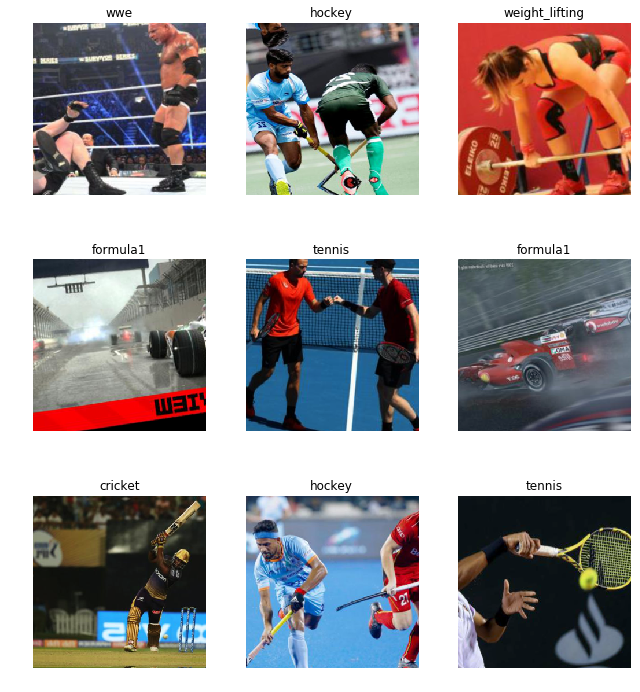

In [46]:
data.show_batch(rows=3, figsize=(9,10))

In [18]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['badminton',
  'baseball',
  'basketball',
  'boxing',
  'chess',
  'cricket',
  'fencing',
  'football',
  'formula1',
  'gymnastics',
  'hockey',
  'ice_hockey',
  'kabaddi',
  'motogp',
  'shooting',
  'swimming',
  'table_tennis',
  'tennis',
  'volleyball',
  'weight_lifting',
  'wrestling',
  'wwe'],
 22,
 11524,
 2881)

## Train model

In [8]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate, accuracy])

In [ ]:
learn.lr_find()

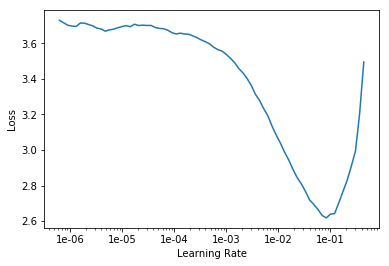

In [53]:
learn.recorder.plot()

In [54]:
lr = 1e-02

In [55]:
learn.callback_fns.append(partial(SaveModelCallback, name='stage-1'))

In [56]:
learn.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.009892,0.521431,0.157584,0.842416,01:04
1,0.771951,0.480679,0.143006,0.856994,01:04
2,0.639336,0.475077,0.140229,0.859771,01:04
3,0.624424,0.429877,0.128775,0.871225,01:04
4,0.510679,0.383587,0.114891,0.885109,01:04
5,0.450217,0.350898,0.098230,0.901770,01:05
6,0.405292,0.326884,0.093370,0.906630,01:04
7,0.335591,0.324571,0.094759,0.905241,01:04
8,0.299965,0.308703,0.092676,0.907324,01:05
9,0.274091,0.308477,0.089899,0.910101,01:05


Better model found at epoch 0 with val_loss value: 0.5214305520057678.
Better model found at epoch 1 with val_loss value: 0.4806792140007019.
Better model found at epoch 2 with val_loss value: 0.47507715225219727.
Better model found at epoch 3 with val_loss value: 0.4298767149448395.
Better model found at epoch 4 with val_loss value: 0.3835865259170532.
Better model found at epoch 5 with val_loss value: 0.35089802742004395.
Better model found at epoch 6 with val_loss value: 0.32688361406326294.
Better model found at epoch 7 with val_loss value: 0.32457074522972107.
Better model found at epoch 8 with val_loss value: 0.3087034523487091.
Better model found at epoch 9 with val_loss value: 0.3084774911403656.


In [69]:
learn.load('stage-1');

In [70]:
learn.unfreeze()

In [59]:
learn.callback_fns.pop()

functools.partial(<class 'fastai.callbacks.tracker.SaveModelCallback'>, name='stage-1')

In [71]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


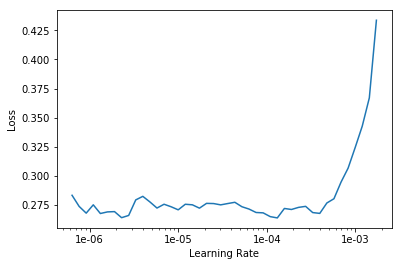

In [72]:
learn.recorder.plot()

In [73]:
learn.callback_fns.append(partial(SaveModelCallback, name='unfreeze-stage-1'))

In [74]:
learn.fit_one_cycle(10, max_lr=slice(1e-05, lr/5))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.268275,0.305367,0.089205,0.910795,01:14
1,0.329663,0.360499,0.104131,0.895869,01:16
2,0.359234,0.403652,0.110031,0.889969,01:17
3,0.311931,0.353994,0.101007,0.898993,01:17
4,0.223990,0.307579,0.090246,0.909754,01:17
5,0.164227,0.301315,0.080875,0.919125,01:17
6,0.113553,0.269432,0.072891,0.927109,01:17
7,0.076370,0.261926,0.069767,0.930233,01:17
8,0.056267,0.250058,0.067685,0.932315,01:17
9,0.048559,0.252194,0.067685,0.932315,01:17


Better model found at epoch 0 with val_loss value: 0.30536749958992004.
Better model found at epoch 5 with val_loss value: 0.3013150691986084.
Better model found at epoch 6 with val_loss value: 0.2694321274757385.
Better model found at epoch 7 with val_loss value: 0.261925607919693.
Better model found at epoch 8 with val_loss value: 0.25005829334259033.


## Going towards a bigger model

In [5]:
arch = models.resnet50

In [8]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=299, num_workers=4, bs=32).normalize(imagenet_stats)

In [9]:
learn = cnn_learner(data, arch, metrics=[error_rate, accuracy])

In [8]:
learn.freeze()

In [9]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


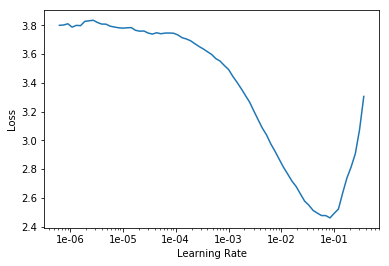

In [10]:
learn.recorder.plot()

In [11]:
learn.callback_fns.append(partial(SaveModelCallback, name='res50-stage-1'))

In [14]:
lr = 1e-02

In [12]:
learn.fit_one_cycle(5, slice(1e-02))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.756356,0.451878,0.129816,0.870184,03:37
1,0.632291,0.339159,0.101701,0.898299,03:36
2,0.480521,0.319693,0.089899,0.910101,03:36
3,0.363959,0.231993,0.068379,0.931621,03:36
4,0.268154,0.223763,0.063520,0.936480,03:36


Better model found at epoch 0 with val_loss value: 0.45187798142433167.
Better model found at epoch 1 with val_loss value: 0.33915868401527405.
Better model found at epoch 2 with val_loss value: 0.31969285011291504.
Better model found at epoch 3 with val_loss value: 0.23199285566806793.
Better model found at epoch 4 with val_loss value: 0.22376325726509094.


In [13]:
learn.load('res50-stage-1');

In [14]:
learn.callback_fns.pop()

functools.partial(<class 'fastai.callbacks.tracker.SaveModelCallback'>, name='res50-stage-1')

In [15]:
learn.unfreeze()

In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


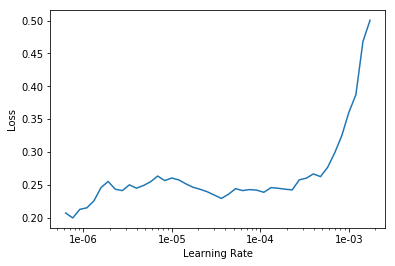

In [19]:
learn.recorder.plot(skip_end=2)

In [20]:
learn.callback_fns.append(partial(SaveModelCallback, name='res50-stage-2'))

In [22]:
learn.fit_one_cycle(5, slice(1e-05, lr/5))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.439997,0.339616,0.101007,0.898993,04:44
1,0.488587,0.326214,0.093023,0.906977,04:45
2,0.326617,0.273313,0.077404,0.922596,04:45
3,0.169591,0.201658,0.055189,0.944811,04:45
4,0.119407,0.193169,0.054148,0.945852,04:45


Better model found at epoch 0 with val_loss value: 0.3396162688732147.
Better model found at epoch 1 with val_loss value: 0.326213538646698.
Better model found at epoch 2 with val_loss value: 0.27331334352493286.
Better model found at epoch 3 with val_loss value: 0.2016582041978836.
Better model found at epoch 4 with val_loss value: 0.19316914677619934.


In [23]:
learn.callback_fns.pop()

functools.partial(<class 'fastai.callbacks.tracker.SaveModelCallback'>, name='res50-stage-2')

In [8]:
learn.callback_fns.append(partial(SaveModelCallback, name='res50-stage-3'))

In [7]:
learn.load('res50-stage-2');

In [9]:
learn.unfreeze()

In [12]:
learn.fit_one_cycle(5, slice(1e-05, lr/5))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.192210,0.164126,0.046512,0.953488,04:51
1,0.296441,0.190816,0.060743,0.939257,04:44
2,0.189959,0.152023,0.047206,0.952794,04:44
3,0.110046,0.122995,0.037487,0.962513,04:45
4,0.060078,0.112601,0.033322,0.966678,04:45


Better model found at epoch 0 with val_loss value: 0.16412577033042908.
Better model found at epoch 2 with val_loss value: 0.15202349424362183.
Better model found at epoch 3 with val_loss value: 0.12299533188343048.
Better model found at epoch 4 with val_loss value: 0.11260063946247101.


In [14]:
learn.load('res50-stage-3');

In [15]:
learn.callback_fns.pop()

functools.partial(<class 'fastai.callbacks.tracker.SaveModelCallback'>, name='res50-stage-3')

In [12]:
learn.callback_fns.append(partial(SaveModelCallback, name='res50-stage-4'))

In [ ]:
learn.fit_one_cycle(7, slice(1e-05, lr/5))

## Model Summary

In [7]:
learn.load('res50-stage-3');

In [9]:
learn.unfreeze()

In [10]:
print(learn.summary())

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 150, 150]       9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 150, 150]       128        True      
______________________________________________________________________
ReLU                 [64, 150, 150]       0          False     
______________________________________________________________________
MaxPool2d            [64, 75, 75]         0          False     
______________________________________________________________________
Conv2d               [64, 75, 75]         4,096      True      
______________________________________________________________________
BatchNorm2d          [64, 75, 75]         128        True      
______________________________________________________________________
Conv2d               [64, 75, 75]         36,864     True      
______________________________________________________________

## Data Augmentation

In [ ]:
def _plot(i,j,ax):
    x,y = data.train_ds[3]
    x.show(ax, y=y)

plot_multi(_plot, 3, 3, figsize=(8,8))

## Interpretation

In [10]:
learn.load('res50-stage-3');

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

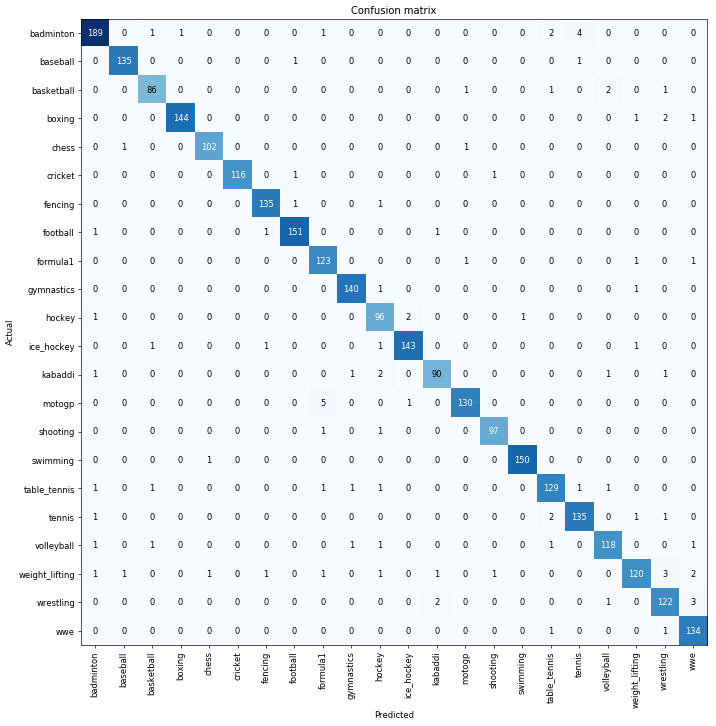

In [22]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [25]:
interp.most_confused(min_val=2)

[('motogp', 'formula1', 5),
 ('badminton', 'tennis', 4),
 ('weight_lifting', 'wrestling', 3),
 ('wrestling', 'wwe', 3),
 ('badminton', 'table_tennis', 2),
 ('basketball', 'volleyball', 2),
 ('boxing', 'wrestling', 2),
 ('hockey', 'ice_hockey', 2),
 ('kabaddi', 'hockey', 2),
 ('tennis', 'table_tennis', 2),
 ('weight_lifting', 'wwe', 2),
 ('wrestling', 'kabaddi', 2)]

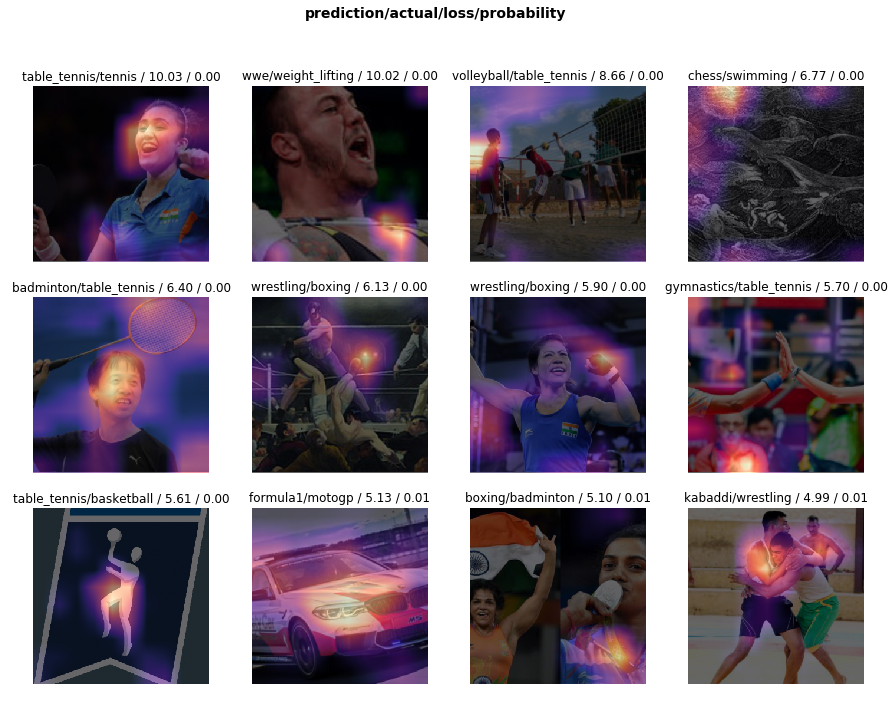

In [24]:
interp.plot_top_losses(12, figsize=(15,11))

In [ ]:
## Train the model on bigger

## Heatmaps

In [39]:
x,y = data.valid_ds[4]

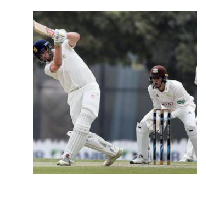

In [40]:
x.show()

In [41]:
learn.predict(x)

(Category cricket,
 tensor(5),
 tensor([6.4501e-10, 2.3926e-05, 8.2807e-10, 9.1013e-11, 2.8775e-08, 9.9998e-01,
         1.9754e-08, 6.3730e-08, 2.4331e-08, 1.5202e-10, 2.4601e-09, 3.0713e-09,
         1.0767e-10, 2.8694e-08, 2.5937e-08, 2.2676e-09, 6.9073e-11, 6.1072e-10,
         2.0101e-10, 2.3219e-10, 4.5435e-10, 8.5350e-11]))

In [42]:
m = learn.model.eval()

In [43]:
xb,_ = data.one_item(x)
xb_im = Image(data.denorm(xb)[0])
xb = xb.cuda()

In [44]:
from fastai.callbacks.hooks import *

In [45]:
def hooked_backward(cat=y):
    with hook_output(m[0]) as hook_a: 
        with hook_output(m[0], grad=True) as hook_g:
            preds = m(xb)
            preds[0,int(cat)].backward()
    return hook_a,hook_g

In [46]:
hook_a,hook_g = hooked_backward()

In [47]:
acts  = hook_a.stored[0].cpu()
acts.shape

torch.Size([2048, 10, 10])

In [48]:
avg_acts = acts.mean(0)
avg_acts.shape

torch.Size([10, 10])

In [51]:
def show_heatmap(hm):
    _,ax = plt.subplots()
    xb_im.show(ax)
    ax.imshow(hm, alpha=0.6, extent=(0,299,299,0),
              interpolation='bilinear', cmap='magma');

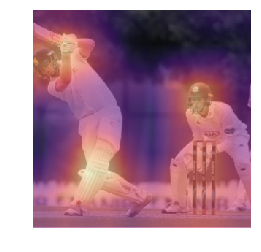

In [52]:
show_heatmap(avg_acts)